# 脉冲神经元模型

作者: [赵振宇](https://github.com/15947470421)

感谢朱文凯为本教程提供的建议

脉冲神经元模型是脉冲神经网络的基础，本章节我们将学习脉冲神经元模型。

人工神经元模型是一个乘累加过程，最终的输出为一个具体的数值。而脉冲神经元的行为与生物神经元高度类似：神经元接受前置神经元的信号，改变膜电压。当膜电压大于阈值后，产生一个输出脉冲，膜电位复位。最终的输出为脉冲的有无。

人工神经元和脉冲神经元模型的区别，类似于电路中，从模拟量到数字量的转变。

`spikingjelly.activation_based.neuron`中定义了各种常见的脉冲神经元模型，我们以`spikingjelly.activation_based.neuron.IFNode`为例来介绍脉冲神经元。

In [50]:
# import
import torch
from spikingjelly.activation_based import neuron # spikingjelly框架中定义神经元的库
from spikingjelly import visualizing
from matplotlib import pyplot as plt

# 定义1个if神经元层
if_layer = neuron.IFNode()

初始化的IF神经元电压为0，我们可以通过.v来查看神经元膜电压

In [51]:
print(f"if_layer.v={if_layer.v}")

if_layer.v=0.0


## 神经元数量
你可能会好奇这一层脉冲神经元的数量是多少。我们给与几个不同的输入，观察该层神经元的shape，可以发现该层神经元的数量与输入的shape是一致的。也就是说，该层神经元的个数与上一层的输入相同。下面我们通过几个实际的例子来进行说明：

1. 上一层有5个信号输入，if_layer生成5个神经元
2. 上一层有7个信号输入，if_layer生成7个神经元
3. 上一层有3组神经元，每组均有5个信号输入，最终是一个[3, 5]的数组类型，if_layer生成[3, 5]个神经元

In [52]:
# 上一层有5个信号输入，if_layer生成5个神经元
x = torch.rand(size=[5])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([5]), if_layer.v.shape=torch.Size([5])
if_layer.reset() # 注意，使用完神经元后需要复位

# 上一层有7个信号输入，if_layer生成7个神经元
x = torch.rand(size=[7])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([7]), if_layer.v.shape=torch.Size([7])
if_layer.reset() # 注意，使用完神经元后需要复位

# 上一层有3组神经元，每组均有5个信号输入[3, 5]，if_layer生成[3, 5]个神经元
x = torch.rand(size=[3, 5])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([3, 5]), if_layer.v.shape=torch.Size([3, 5])
if_layer.reset() # 注意，使用完神经元后需要复位

x.shape=torch.Size([5]), if_layer.v.shape=torch.Size([5])
x.shape=torch.Size([7]), if_layer.v.shape=torch.Size([7])
x.shape=torch.Size([3, 5]), if_layer.v.shape=torch.Size([3, 5])


接下来，让我们来观察一下脉冲神经元的膜电压随时间的变化：

我们设定总时间`T=150`，每一个时刻均给予脉冲神经元输入信号电压`x=0.02V`。

通过SJ框架提供的`visualizing.plot_one_neuron_v_s`函数，我们可以直接画出神经元的膜电压V和输出脉冲S随时间变化的图像。

input: tensor([0.0200])
votage: [tensor([0.0200]), tensor([0.0400]), tensor([0.0600]), tensor([0.0800]), tensor([0.1000]), tensor([0.1200]), tensor([0.1400]), tensor([0.1600]), tensor([0.1800]), tensor([0.2000]), tensor([0.2200]), tensor([0.2400]), tensor([0.2600]), tensor([0.2800]), tensor([0.3000]), tensor([0.3200]), tensor([0.3400]), tensor([0.3600]), tensor([0.3800]), tensor([0.4000]), tensor([0.4200]), tensor([0.4400]), tensor([0.4600]), tensor([0.4800]), tensor([0.5000]), tensor([0.5200]), tensor([0.5400]), tensor([0.5600]), tensor([0.5800]), tensor([0.6000]), tensor([0.6200]), tensor([0.6400]), tensor([0.6600]), tensor([0.6800]), tensor([0.7000]), tensor([0.7200]), tensor([0.7400]), tensor([0.7600]), tensor([0.7800]), tensor([0.8000]), tensor([0.8200]), tensor([0.8400]), tensor([0.8600]), tensor([0.8800]), tensor([0.9000]), tensor([0.9200]), tensor([0.9400]), tensor([0.9600]), tensor([0.9800]), tensor([1.0000]), tensor([0.]), tensor([0.0200]), tensor([0.0400]), tensor([0.0600]),

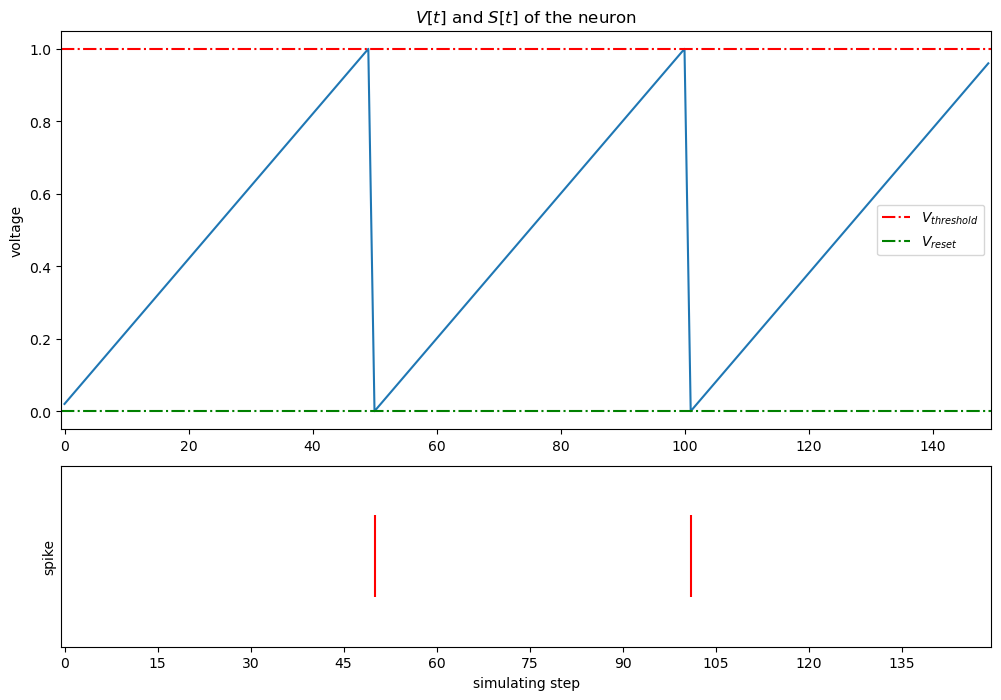

In [53]:
T = 150
if_layer.reset() # 神经元复位
x = torch.as_tensor([0.02])
print("input:", x)
s_list = [] # 记录输出脉冲
v_list = [] # 记录输出膜电压
# 按照时间顺序逐步进行
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

print("votage:", v_list) # 输出膜电压
dpi = 100 # 设置输出图片大小
figsize = (12, 8) # 设置输出图片比例
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

可以看到，随着时间的增加，膜电压每一个时刻增加0.02V，也就是将输入的信号x，增加到膜电位上。

默认的膜电压阈值为1V。因此，当膜电压小于1V时，没有产生脉冲。当膜电压累加到IF神经元默认的阈值电压1V时，神经元发出一个脉冲，并且膜电位复位到0V。

上面的仿真，我们假设输入的信号一直为0.02V，接下来我们使用随机的输入信号电压值。我们设定总时间$T=50$，每一步的输入信号电压$x=[0.0 , 0.1]V$。

tensor([0.0060, 0.0573, 0.0674, 0.0530, 0.0227, 0.0479, 0.0282, 0.0509, 0.0134,
        0.0249, 0.0652, 0.0022, 0.0321, 0.0811, 0.0888, 0.0005, 0.0007, 0.0672,
        0.0655, 0.0784, 0.0820, 0.0517, 0.0449, 0.0692, 0.0025, 0.0225, 0.0298,
        0.0174, 0.0163, 0.0471, 0.0925, 0.0083, 0.0326, 0.0311, 0.0292, 0.0889,
        0.0500, 0.0300, 0.0071, 0.0011, 0.0969, 0.0081, 0.0979, 0.0288, 0.0167,
        0.0384, 0.0688, 0.0452, 0.0385, 0.0038])
v_list = [tensor([0.0060]), tensor([0.0633]), tensor([0.1306]), tensor([0.1836]), tensor([0.2063]), tensor([0.2542]), tensor([0.2824]), tensor([0.3334]), tensor([0.3468]), tensor([0.3717]), tensor([0.4369]), tensor([0.4391]), tensor([0.4713]), tensor([0.5524]), tensor([0.6412]), tensor([0.6418]), tensor([0.6424]), tensor([0.7096]), tensor([0.7751]), tensor([0.8534]), tensor([0.9355]), tensor([0.9872]), tensor([0.]), tensor([0.0692]), tensor([0.0716]), tensor([0.0941]), tensor([0.1239]), tensor([0.1413]), tensor([0.1576]), tensor([0.2047]), tenso

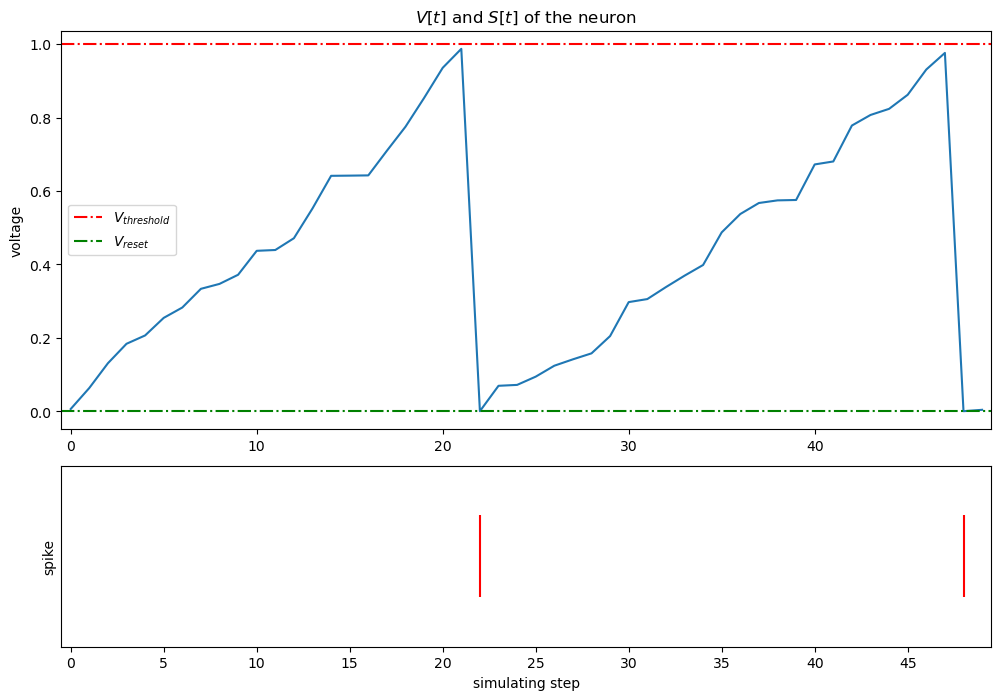

In [54]:
T = 50
if_layer.reset()
x = torch.rand(T) / 10. # 随机生成长度为T的输入，最后缩小10倍
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x[t]).unsqueeze(0)) # .unsqueeze确保维度正确
    v_list.append(if_layer.v.unsqueeze(0)) # .unsqueeze确保维度正确

print(f"v_list = {v_list}")
print(f"s_list = {s_list}")
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

通过输出图像可以看到，由于输入的信号为随机值，因此每一时刻膜电压的增量不再相同，不再是平滑的三角波。

如果我们希望更改阈值电压`v threshold`或者替代函数`surrogate function`，SJ框架也提供了非常方便的API。

IFNode共有7个参数可以设置，具体的参数介绍可以查看class IFNode的简介。
+ `v_threshold`: 神经元的阈值电压
+ `v_reset`: 神经元的重置电压。如果不为 ``None``，当神经元释放脉冲后，电压会被重置为 ``v_reset``；
    如果设置为 ``None``，当神经元释放脉冲后，电压会被减去 ``v_threshold``
+ `surrogate_function`: 反向传播时用来计算脉冲函数梯度的替代函数
+ `detach_reset`: 是否将reset过程的计算图分离
+ `step_mode`: 步进模式，可以为 `'s'` (单步) 或 `'m'` (多步)
+ `backend`: 使用那种后端。不同的 ``step_mode`` 可能会带有不同的后端。可以通过打印 ``self.supported_backends`` 查看当前
    使用的步进模式支持的后端。在支持的情况下，使用 ``'cupy'`` 后端是速度最快的
+ `store_v_seq`: 在使用 ``step_mode = 'm'`` 时，给与 ``shape = [T, N, *]`` 的输入后，是否保存中间过程的 ``shape = [T, N, *]``
    的各个时间步的电压值 ``self.v_seq`` 。设置为 ``False`` 时计算完成后只保留最后一个时刻的电压，即 ``shape = [N, *]`` 的 ``self.v`` 。
    通常设置成 ``False`` ，可以节省内存

下面我们将神经元的阈值电压`v threshold`更改为2V，替代函数`surrogate function`更改为`ATan`

tensor([0.0339, 0.0251, 0.0641, 0.0263, 0.0982, 0.0668, 0.0399, 0.0985, 0.0933,
        0.0578, 0.0323, 0.0479, 0.0262, 0.0354, 0.0854, 0.0702, 0.0138, 0.0609,
        0.0554, 0.0522, 0.0776, 0.0887, 0.0274, 0.0187, 0.0090, 0.0263, 0.0602,
        0.0684, 0.0247, 0.0264, 0.0292, 0.0262, 0.0707, 0.0550, 0.0840, 0.0368,
        0.0512, 0.0954, 0.0598, 0.0980, 0.0280, 0.0858, 0.0085, 0.0449, 0.0264,
        0.0916, 0.0934, 0.0376, 0.0750, 0.0264])
v_list = [tensor([0.0339]), tensor([0.0590]), tensor([0.1231]), tensor([0.1495]), tensor([0.2477]), tensor([0.3144]), tensor([0.3543]), tensor([0.4529]), tensor([0.5462]), tensor([0.6039]), tensor([0.6363]), tensor([0.6842]), tensor([0.7103]), tensor([0.7458]), tensor([0.8312]), tensor([0.9014]), tensor([0.9152]), tensor([0.9761]), tensor([1.0316]), tensor([1.0838]), tensor([1.1614]), tensor([1.2501]), tensor([1.2774]), tensor([1.2962]), tensor([1.3052]), tensor([1.3315]), tensor([1.3916]), tensor([1.4600]), tensor([1.4847]), tensor([1.5112]), t

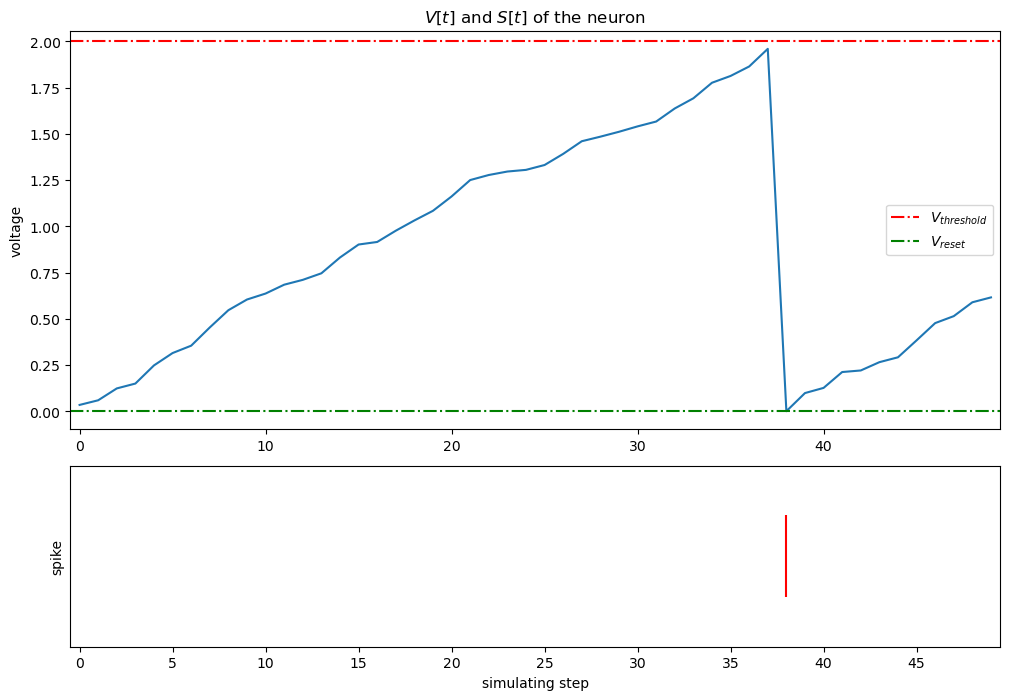

In [55]:
from spikingjelly.activation_based import surrogate # 引入替代函数库
T = 50
if_layer.reset()
if_layer.v_threshold=2.0
if_layer.surrogate_function=surrogate.ATan()

x = torch.rand(T) / 10. # 随机生成长度为T的输入，最后缩小10倍
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x[t]).unsqueeze(0)) # .unsqueeze确保维度正确
    v_list.append(if_layer.v.unsqueeze(0)) # .unsqueeze确保维度正确

print(f"v_list = {v_list}")
print(f"s_list = {s_list}")
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

更改后，当膜电压增加到2.0V时，才会发出脉冲。

目前为止，我们还只是仿真一个神经元，通常，一层神经元由很多个神经元组成。

下面让我们拓展到仿真多个神经元，其中，每一个神经元仍只有1个输入信号。

SJ框架提供`visualizing.plot_2d_heatmap`函数，可以画出多个神经元的膜电压随时间的变化热力图像，颜色越浅，表明膜电压越高。

SJ框架提供`visualizing.plot_1d_spikes`函数，可以画出多个神经元随时间变化输出的脉冲，并统计发射脉冲的频率`firing rate`

x = tensor([0.0221, 0.0497, 0.0194, 0.0543, 0.0010, 0.0346, 0.0897, 0.0124, 0.0940,
        0.0510])


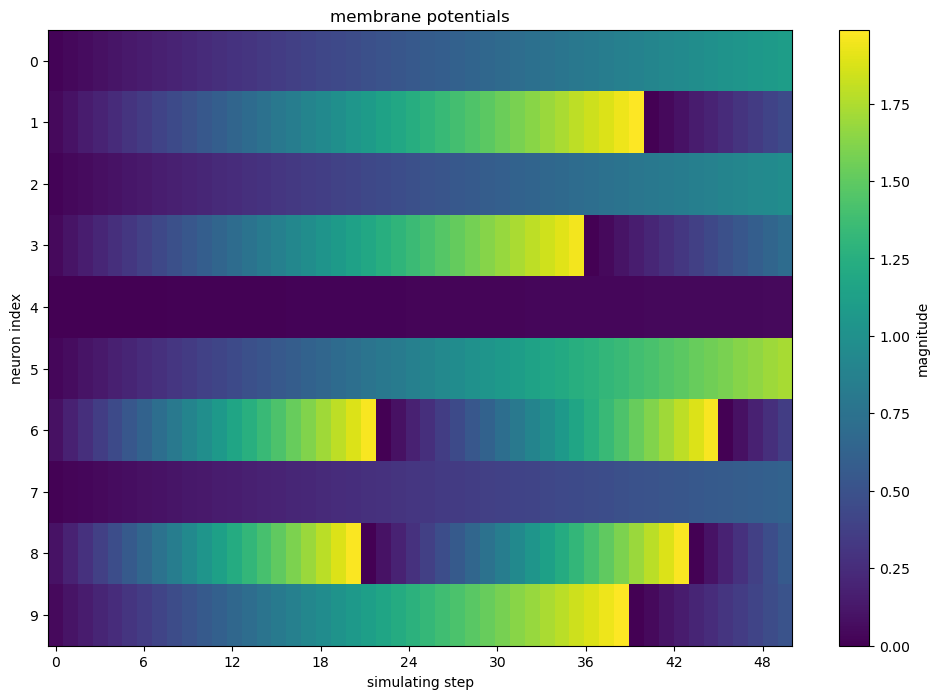

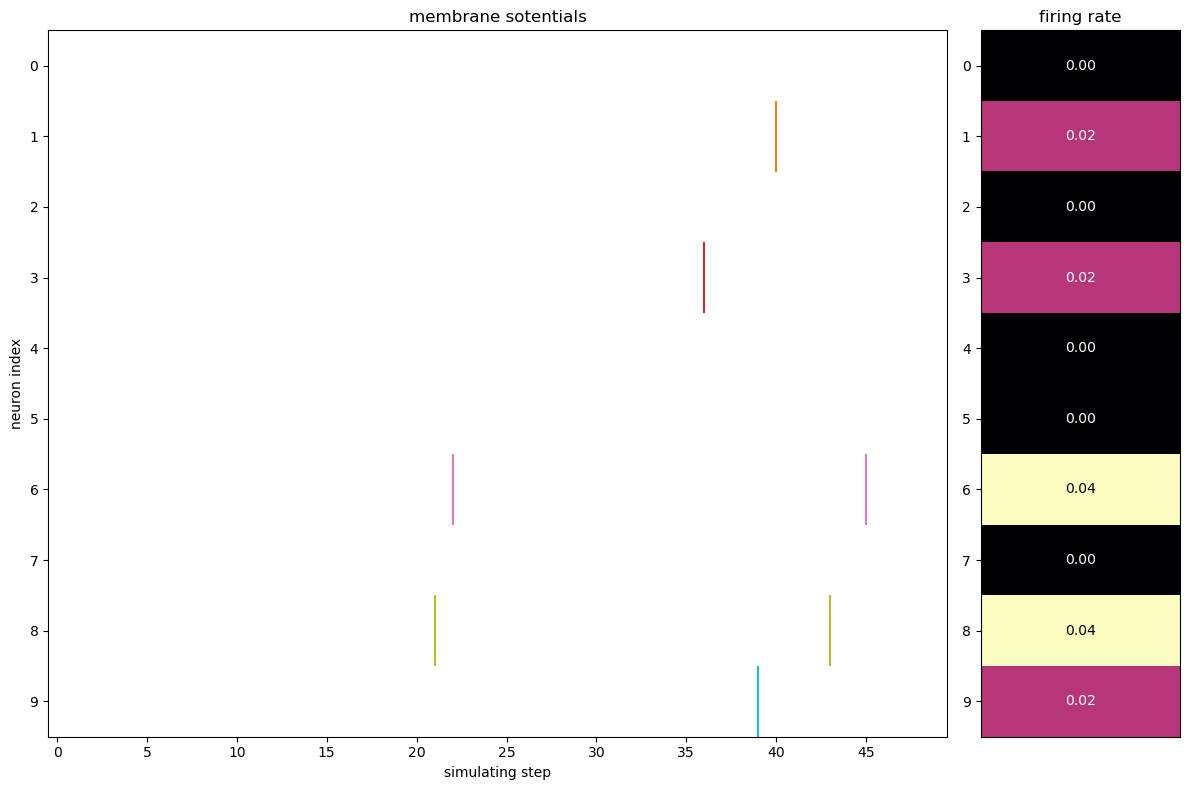

In [56]:
T = 50
N = 10 # 神经元个数N(num_neuron)
if_layer.reset()
x = torch.rand(N) / 10. # 随机生成长度为N(num_neuron)的输入，最后缩小10倍
print(f"x = {x}")
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0)) # .unsqueeze确保维度正确
    v_list.append(if_layer.v.unsqueeze(0)) # .unsqueeze确保维度正确

s_list = torch.cat(s_list) # 整合为1个tensor
v_list = torch.cat(v_list) # 整合为1个tensor

dpi = 100
figsize = (12, 8)
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

注意，我们这里只是生成了一个输入信号向量，在每一个时间步长中，同一个神经元的输入信号均相同。也就是说每一个时间步长的循环中，输入均为向量x，同一个神经元的膜电位增量均相同，说明输入信号一直相同。

如果我们想让每一个时刻的输入信号都不同，那么就要将x拓展一个时间维度，从一个向量拓展为一个矩阵。矩阵的每一行代表一个时刻的所有神经元输入信号，每一列代表每一个神经元的输入信号。最终输入信号`x.shape = [T, N]`

x.shape = torch.Size([50, 10])


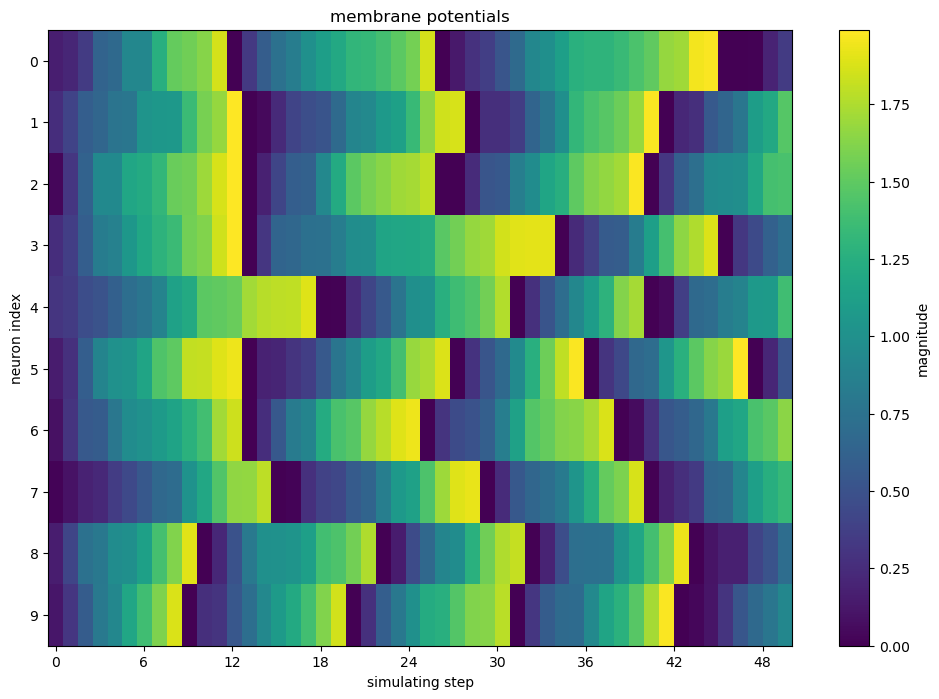

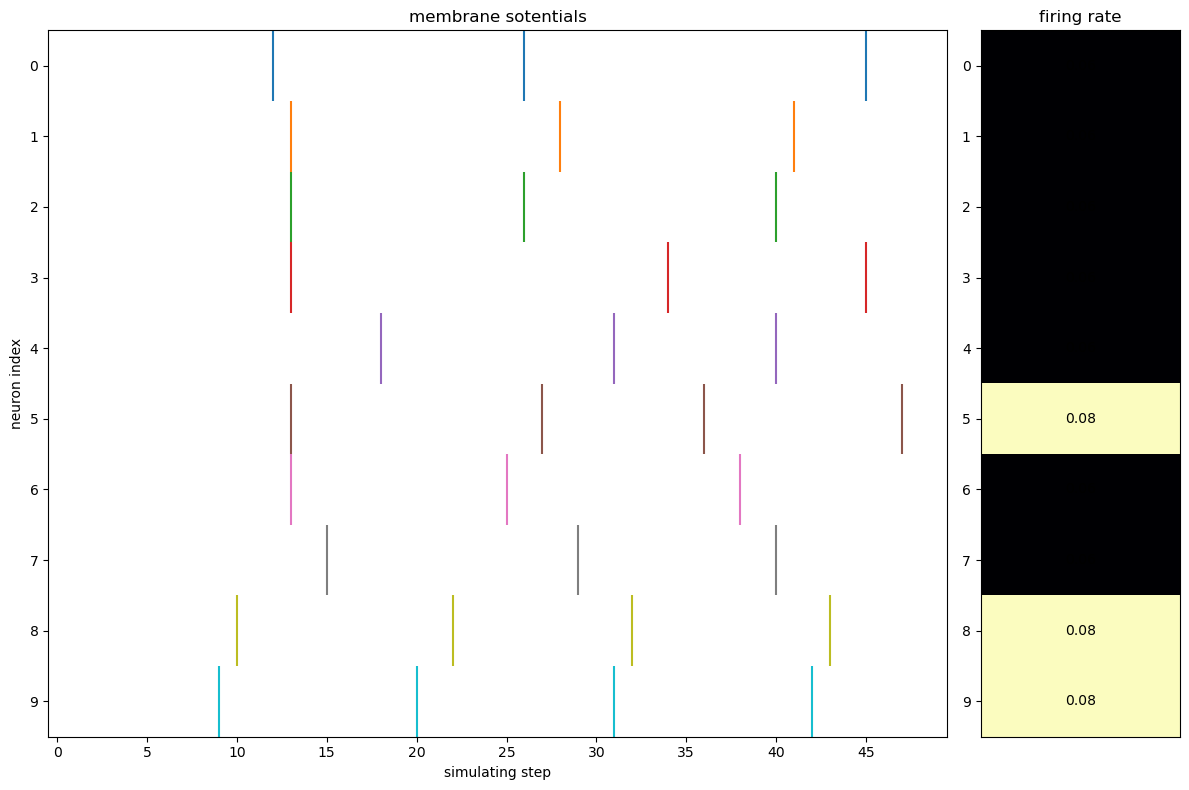

In [57]:
T = 50
N = 10 # 神经元个数
if_layer.reset()
x = torch.rand([T, N]) / 3. # 随机生成大小为[T, N]的输入，最后缩小5倍
print(f"x.shape = {x.shape}")
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x[t]).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 100
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

同一个神经元的输出脉冲时间间隔都不相同，说明输入信号随时间变化。

上面的方法我们是通过循环的方法实现多步时间的，惊蛰框架提供了多步模式，可以更简洁和方便的实现多步时间。

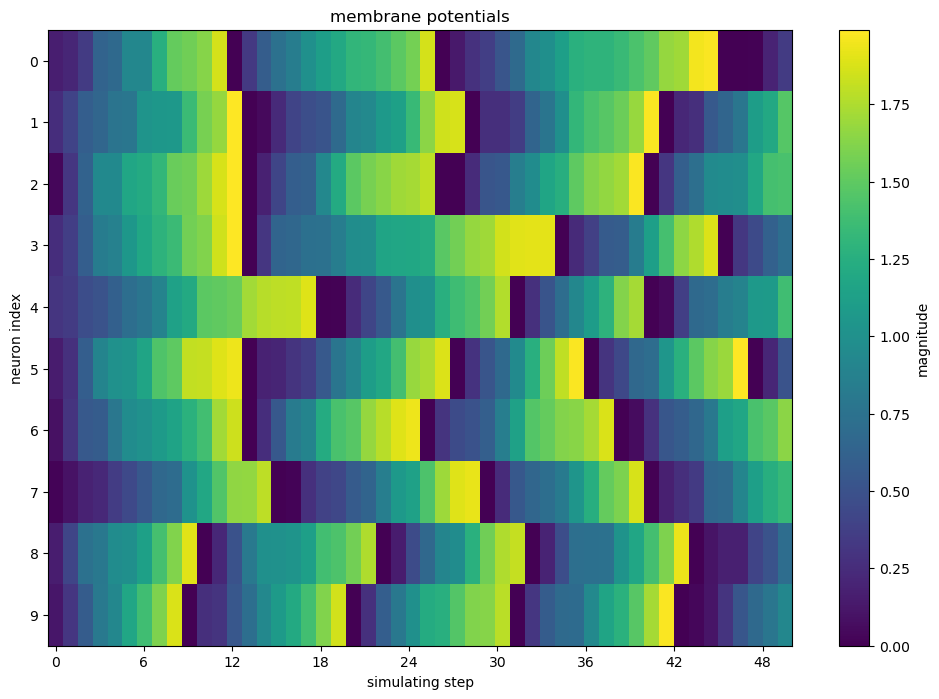

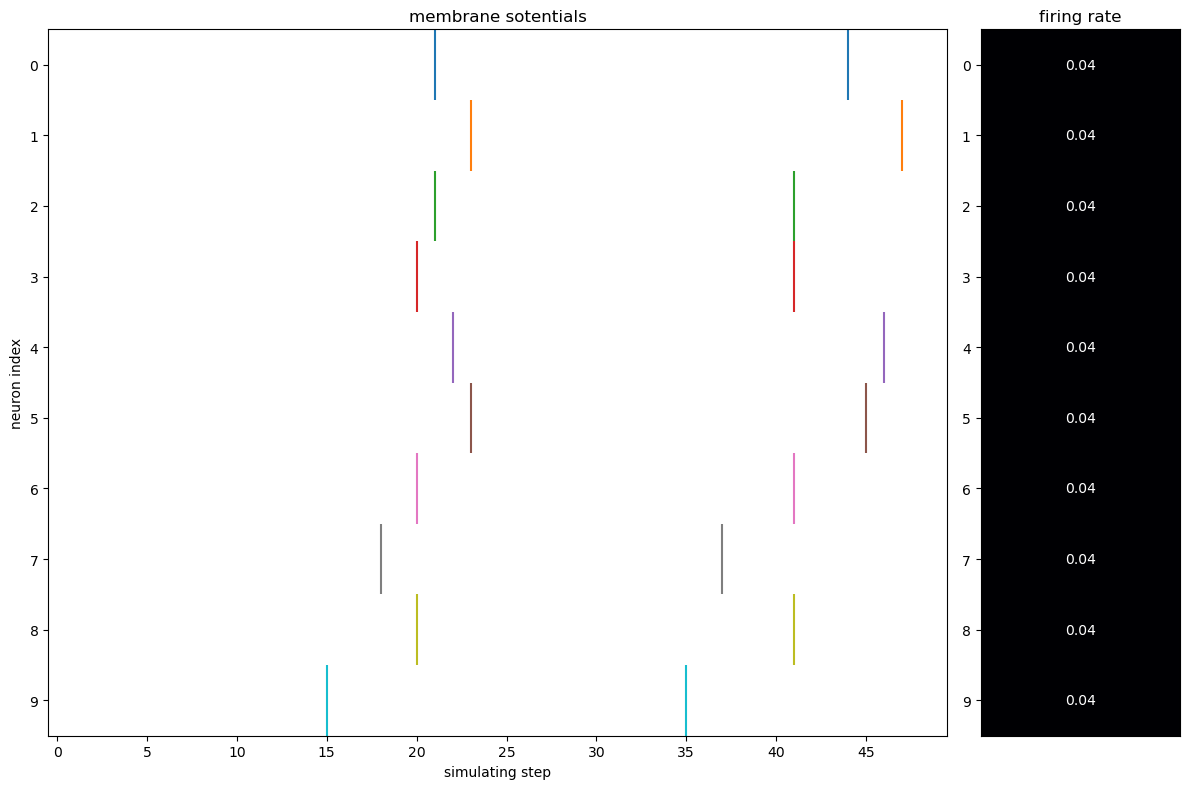

In [58]:
if_layer.reset() # 复位神经元
if_layer.step_mode = 'm' # 设置神经元为多步模式
if_layer.store_v_seq = True # 保存每一个时刻的膜电压
x = torch.rand([T, N]) / 5. # 生成输入数据
spike = if_layer(x)

figsize = (12, 8)
dpi = 100
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=spike.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

if_layer.reset()

## LIF神经元模型：

Leaky Integrate-and-Fire(LIF) 神经元模型，可以看作是带漏电效应的IF神经元模型（膜电压会随着时间缓慢下降）。当膜电压小于阈值时，LIF神经元的神经动力学方程为：

若 ``decay_input == True``:
    $H[t] = V[t-1] + \frac{1}{\tau}(X[t] - (V[t-1] - V_{reset}))$

若 ``decay_input == False``:
    $H[t] = V[t-1] - \frac{1}{\tau}(V[t-1] - V_{reset}) + X[t]$

我们仿真IF神经元模型，以及时间常数分别为$tau=1，tau=2，tau=5$的LIF神经元模型

输入的信号为仅在t=9时产生一个强度为0.99的脉冲，仿真周期`T=50`

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900]), tensor([0.9900

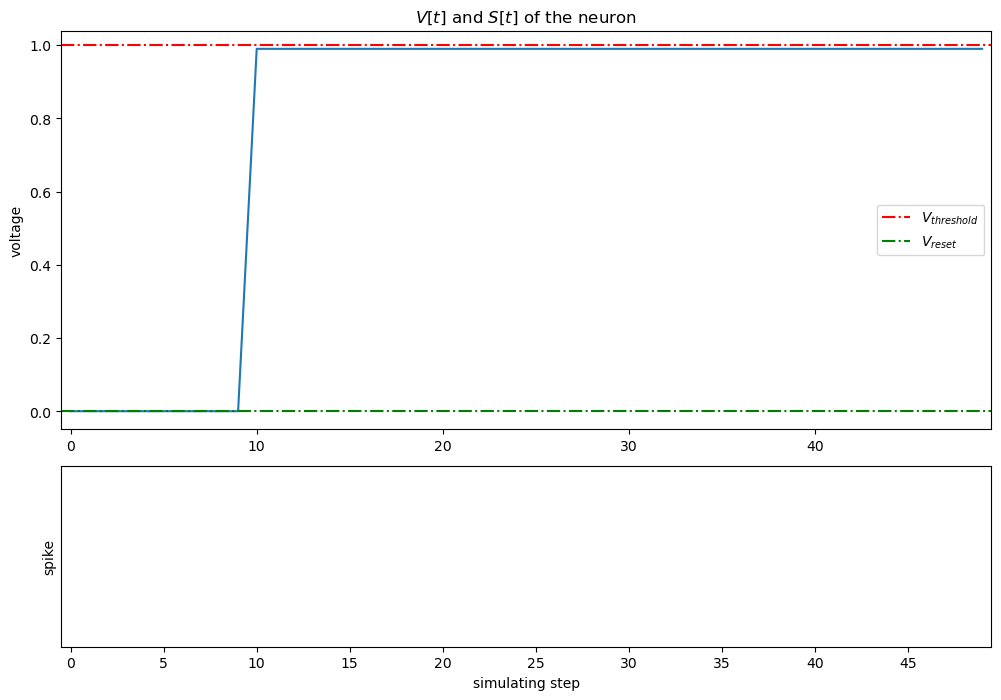

In [ ]:
# IF神经元模型
if_layer = neuron.IFNode()
if_layer.reset() # 复位神经元
T = 50
x = torch.as_tensor([0.0]*10 + [0.99]*1 + [0.0]*39)
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x[t]).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

print(v_list)
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.9900]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), 

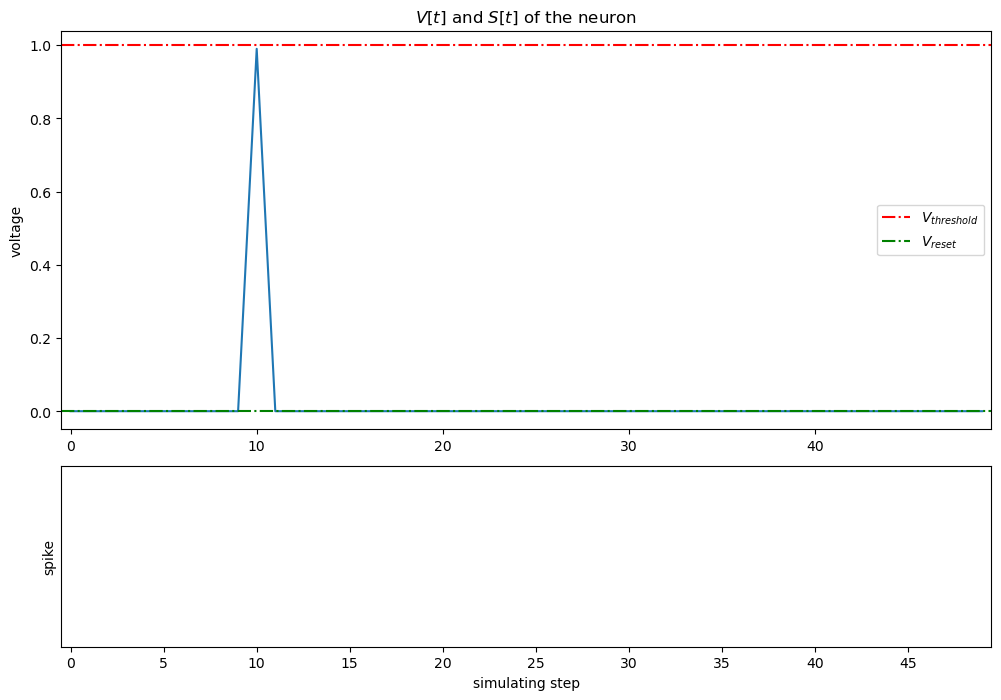

In [ ]:
# LIF神经元模型tau=1
lif_layer = neuron.LIFNode()
lif_layer.tau = 1.
lif_layer.reset()
T = 50
x = torch.as_tensor([0.0]*10 + [0.99]*1 + [0.0]*39)
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x[t]).unsqueeze(0))
    v_list.append(lif_layer.v.unsqueeze(0))

print(v_list)
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.4950]), tensor([0.2475]), tensor([0.1238]), tensor([0.0619]), tensor([0.0309]), tensor([0.0155]), tensor([0.0077]), tensor([0.0039]), tensor([0.0019]), tensor([0.0010]), tensor([0.0005]), tensor([0.0002]), tensor([0.0001]), tensor([6.0425e-05]), tensor([3.0212e-05]), tensor([1.5106e-05]), tensor([7.5531e-06]), tensor([3.7766e-06]), tensor([1.8883e-06]), tensor([9.4414e-07]), tensor([4.7207e-07]), 

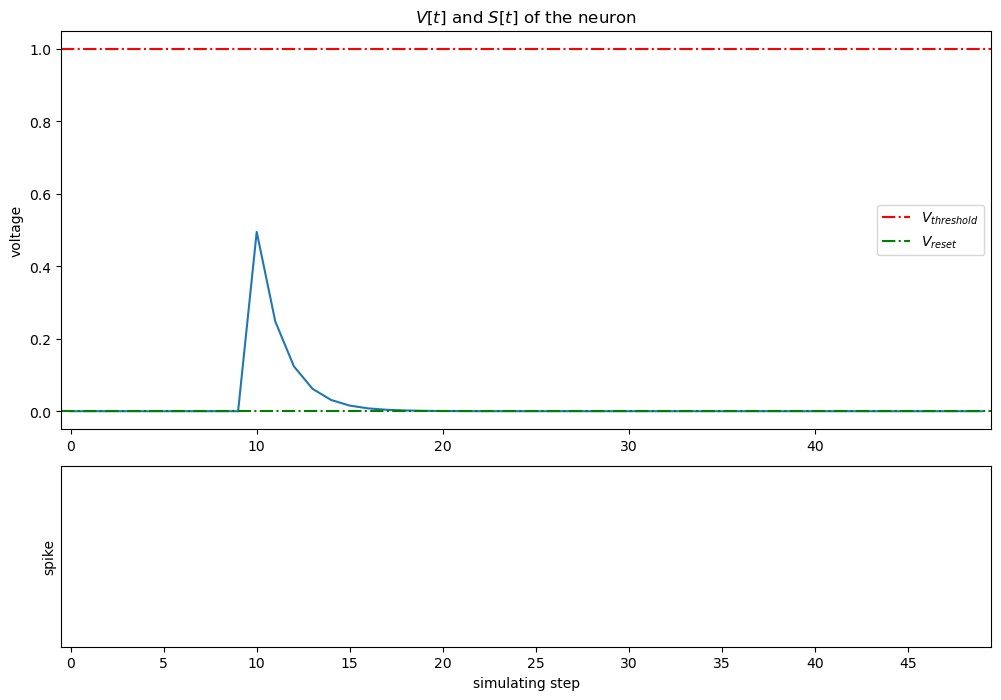

In [ ]:
# LIF神经元模型tau=2
lif_layer = neuron.LIFNode()
lif_layer.tau = 2.
lif_layer.reset()
T = 50
x = torch.as_tensor([0.0]*10 + [0.99]*1 + [0.0]*39)
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x[t]).unsqueeze(0))
    v_list.append(lif_layer.v.unsqueeze(0))

print(v_list)
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.1980]), tensor([0.1584]), tensor([0.1267]), tensor([0.1014]), tensor([0.0811]), tensor([0.0649]), tensor([0.0519]), tensor([0.0415]), tensor([0.0332]), tensor([0.0266]), tensor([0.0213]), tensor([0.0170]), tensor([0.0136]), tensor([0.0109]), tensor([0.0087]), tensor([0.0070]), tensor([0.0056]), tensor([0.0045]), tensor([0.0036]), tensor([0.0029]), tensor([0.0023]), tensor([0.0018]), tensor([0.0015

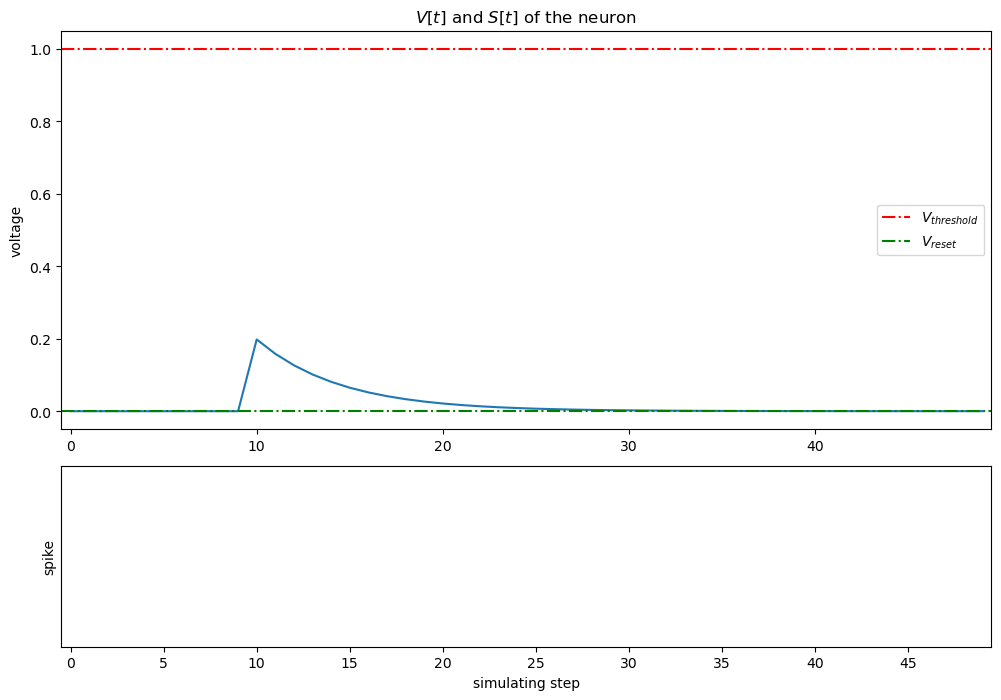

In [ ]:
# LIF神经元模型tau=5
lif_layer = neuron.LIFNode()
lif_layer.tau = 5.
lif_layer.reset()
T = 50
x = torch.as_tensor([0.0]*10 + [0.99]*1 + [0.0]*39)
print(x)
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x[t]).unsqueeze(0))
    v_list.append(lif_layer.v.unsqueeze(0))

print(v_list)
dpi = 100
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

通过观察上面4个仿真结果，IF神经元模型没有衰减，没有输入的时候，膜电压保持不变。而LIF神经元模型的膜电压则会随时间衰减，最终趋向于0V。

LIF神经元模型中参数`tau`的含义非常类似于电路中的RC时间常数，tau越大，表示该神经元对输入的响应以及膜电压衰减越缓慢，反之亦然。